<a href="https://colab.research.google.com/github/giavonnadonati/Data_Science/blob/main/Donati_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [52]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
#importing software

In [54]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [56]:
url = "https://docs.google.com/presentation/d/1STF3HJOrW0NNqd4b4g4hzN0chTgT5gGS9f7KRYCT3cg/edit#slide=id.g1bad632fa45_0_26"

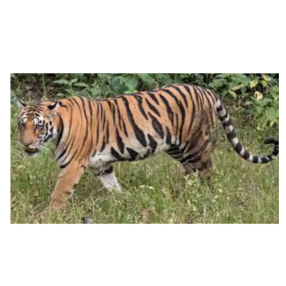

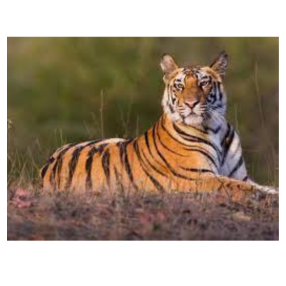

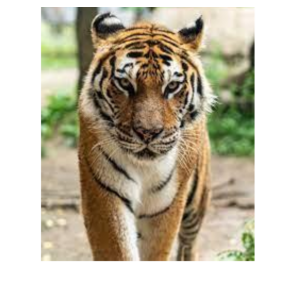

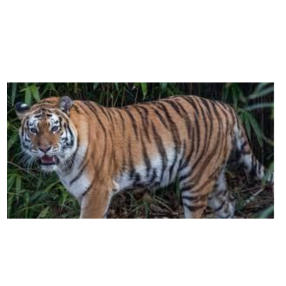

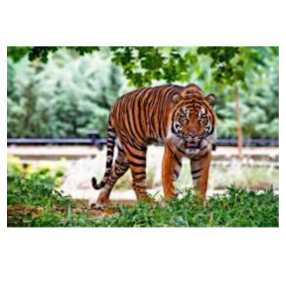

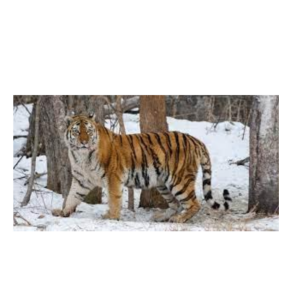

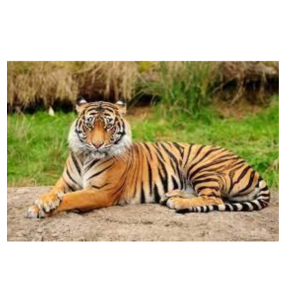

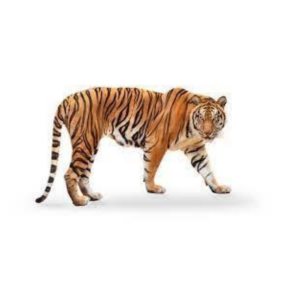

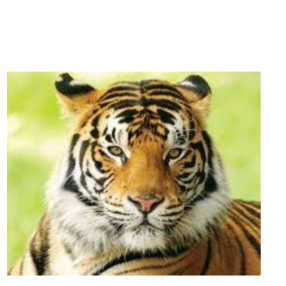

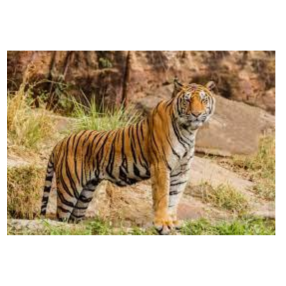

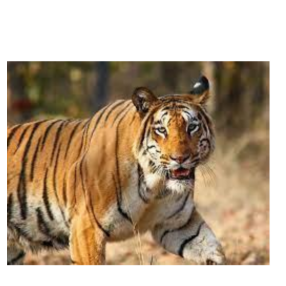

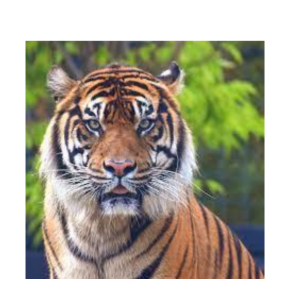

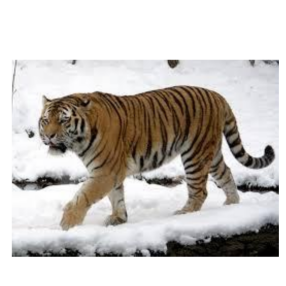

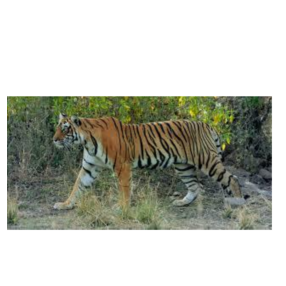

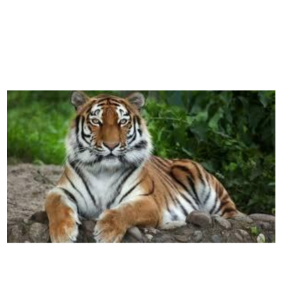

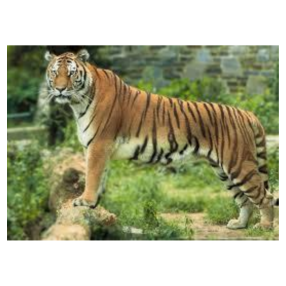

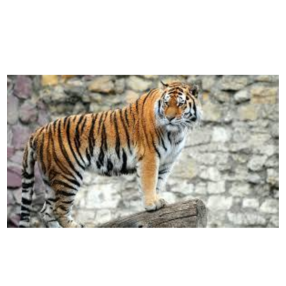

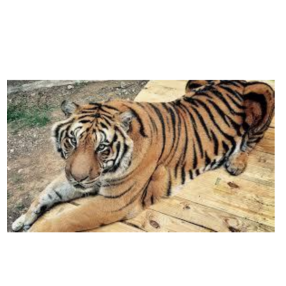

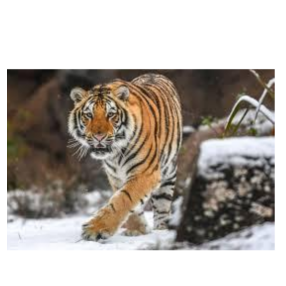

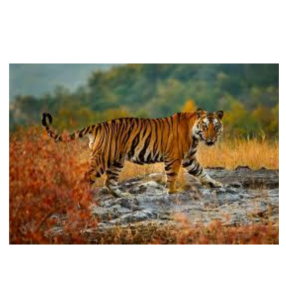

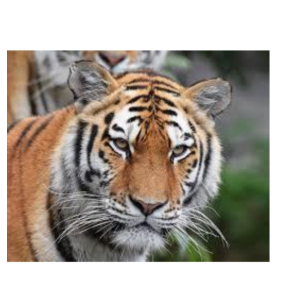

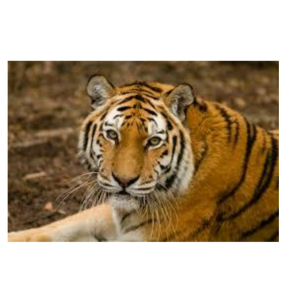

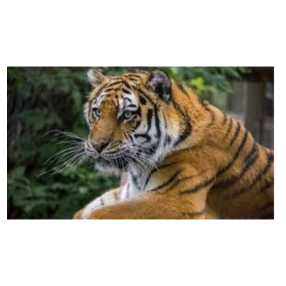

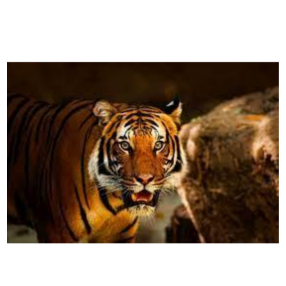

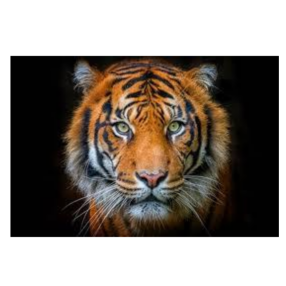

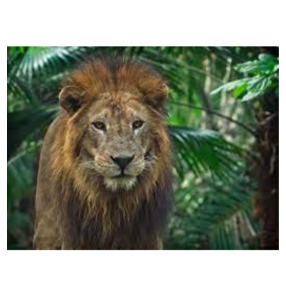

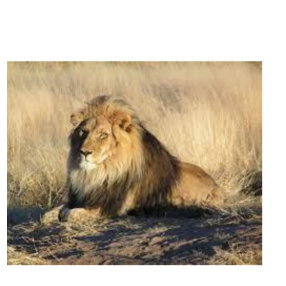

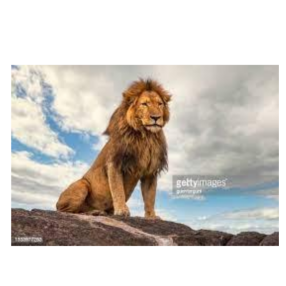

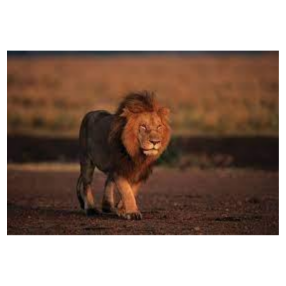

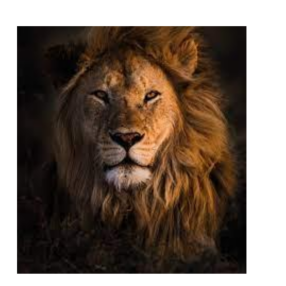

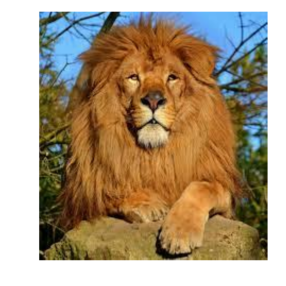

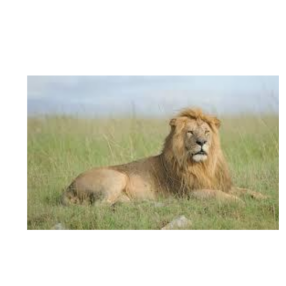

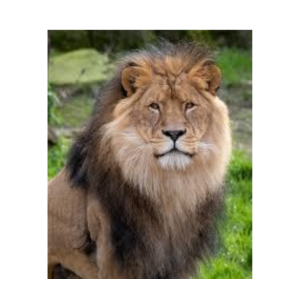

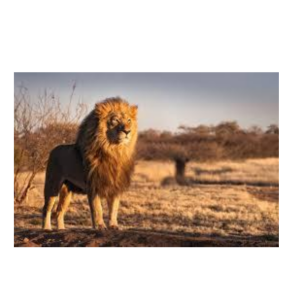

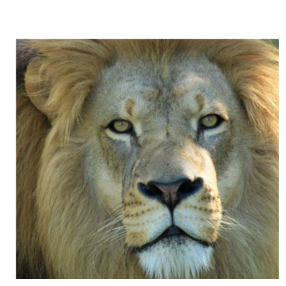

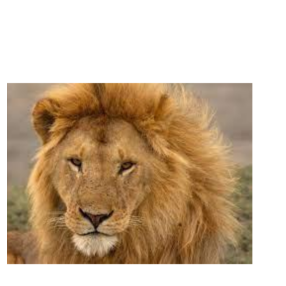

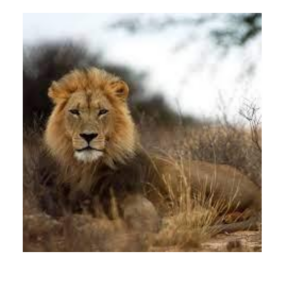

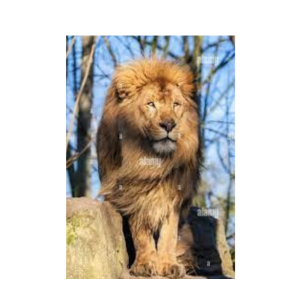

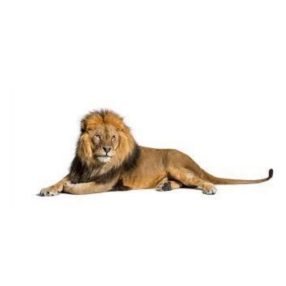

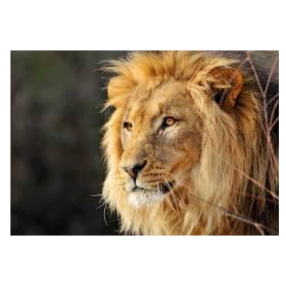

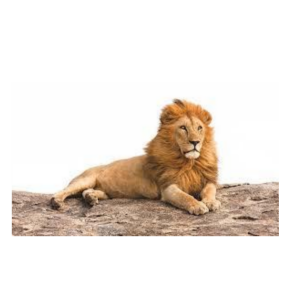

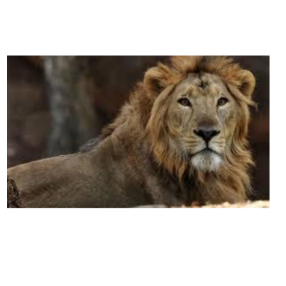

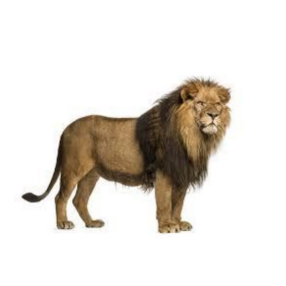

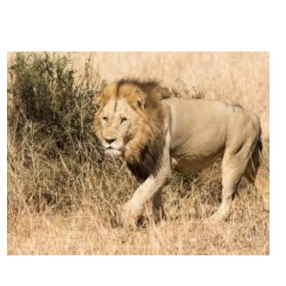

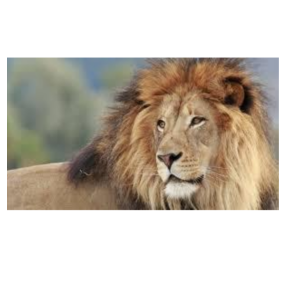

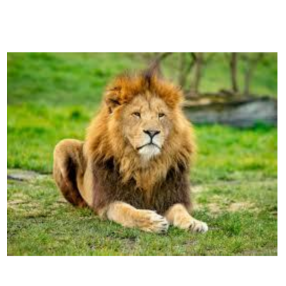

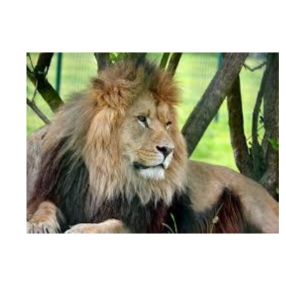

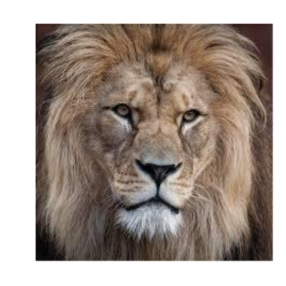

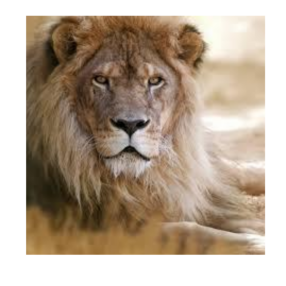

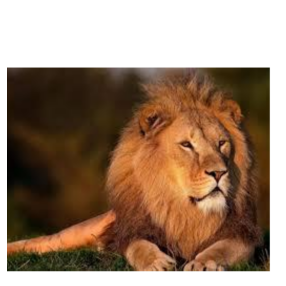

In [57]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [58]:
images.shape

torch.Size([50, 3, 224, 224])

In [8]:
model(images)

tensor([[  1.6792,  -2.6971,  -3.9214,  ...,  -2.3259,   1.8883,   1.0105],
        [ -0.4942,  -1.4627,  -4.6504,  ...,  -0.0607,   0.3922,   0.4931],
        [ -4.3727,  -3.9225,  -5.3254,  ...,  -5.6546,   2.2667,   4.4345],
        ...,
        [ -4.1894, -10.1237,  -8.2616,  ...,  -6.8448,   4.5039,   1.7637],
        [ -5.0610,  -7.4105,  -7.1857,  ...,  -6.4030,   3.7438,   3.8392],
        [ -5.8156,  -6.0874,  -8.1232,  ...,  -4.5621,   4.5634,   0.6517]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
y = model(images)

In [60]:
y.shape

torch.Size([50, 1000])

In [61]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [62]:
for i in list(guesses):
    print(labels[i])

tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
tiger, Panthera tigris
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
lion, king of beasts, Panthera leo
chow,

In [63]:
Y = np.zeros(50,) #defining Y as the zeros in the images, like making an answer key
Y[25:] = 1

In [64]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
X = y.detach().cpu().numpy() 
#defining X and returning new tensor, detaching it from current graph

In [66]:
X.shape

(50, 1000)

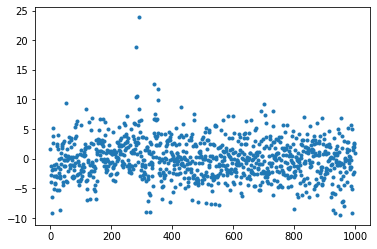

In [67]:
plt.plot(X[0],'.') #plotting X and giving outputs for each category"

In [80]:
X[0] #first element of arrays

tensor([ 1.6792e+00, -2.6971e+00, -3.9214e+00, -1.2323e+00, -9.1335e+00,
        -1.8516e+00, -6.5402e+00,  2.6983e+00,  3.8714e+00,  5.2448e+00,
        -1.7431e+00, -5.1343e+00, -3.0143e+00, -1.0335e+00, -4.2766e+00,
        -1.7362e+00, -4.0369e+00, -2.8681e+00, -9.5016e-01, -2.8694e+00,
        -3.0680e+00,  2.4073e+00, -5.2280e+00,  2.1000e+00,  3.9445e+00,
         1.5981e+00, -1.4196e+00, -5.2586e+00, -2.4641e+00,  1.1812e-02,
        -3.3243e+00, -8.6199e+00, -2.8815e+00, -1.7822e+00, -8.7324e-01,
         6.3438e-02,  1.0068e+00,  2.1312e+00,  2.4328e+00,  1.8403e+00,
        -3.9863e+00,  2.6861e+00, -4.5103e+00, -2.2426e-01, -2.9725e+00,
         3.0141e+00, -1.2600e+00, -3.1480e-01, -1.3172e+00,  6.3626e-01,
        -3.7853e+00,  9.4075e+00,  4.5626e-01,  1.5830e+00, -2.7893e-01,
        -3.9271e+00, -2.9391e-01, -2.0997e+00,  1.2654e-01,  5.2778e-01,
         3.7325e+00,  1.7560e-01,  2.8624e+00, -1.0614e+00, -1.5555e+00,
        -1.0692e+00,  3.4253e+00,  2.1913e-01,  1.9

In [69]:
np.argmax(X[0]) #the max spot in set of data/ graph

292

In [70]:
labels[292]

'tiger, Panthera tigris'

In [71]:
top_ten = np.argsort(X[0])[::-1][0:10] # will show the top 10 guesses of images

In [73]:
for i in top_ten: #for each of top ten guesses
    print(labels[i]) # will print labels/guesses it has and the corresponding number

tiger, Panthera tigris
tiger cat
zebra
impala, Aepyceros melampus
Egyptian cat
tabby, tabby cat
gazelle
triceratops
paper towel
barrel, cask


In [74]:
labels #all things computer has trained to classify

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 30., 163., 387., 314.,  88.,  13.,   3.,   0.,   1.,   1.]),
 array([-9.503189  , -6.1659055 , -2.828622  ,  0.50866145,  3.845945  ,
         7.1832285 , 10.520512  , 13.857796  , 17.19508   , 20.532362  ,
        23.869646  ], dtype=float32),
 <a list of 10 Patch objects>)

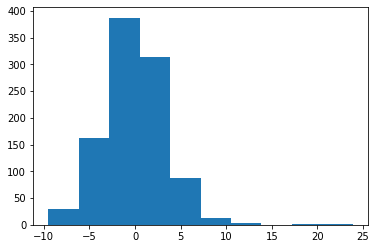

In [75]:
plt.hist(X[0]) # plots histogram

In [76]:
X = GPU_data(X)
Y = GPU_data(Y)

In [81]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [82]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [83]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [84]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [85]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [86]:
X.shape #gives shape of torch

torch.Size([50, 1000])

In [87]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [88]:
def model(x,w):

    return x@w[0]

In [89]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})
    #logs acc_train for plot

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()
#logs acc_train and loss

<ipython-input-54-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

run 1:0.5938
run 2: 0.3438
run 3: 1

In [40]:
(.5938+.3438+1)/3

0.6458666666666667

average: 0.6458666666666667

best: 1

worst: .3438